# Exploratory Data Analsis

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plo
import numpy as np
import sys
sys.path.append("..")

import MyAnalysisApi as myapi


myapi.setup_env()


In [137]:
#load_data

df_train = pd.read_csv("dataset/transformed/train_transformed.csv")
df_test = pd.read_csv("dataset/transformed/test_transformed.csv")

## Analasying Data with regard the categorical Data

### Holidays  balancing

Text(0, 0.5, 'Frequency Amount')

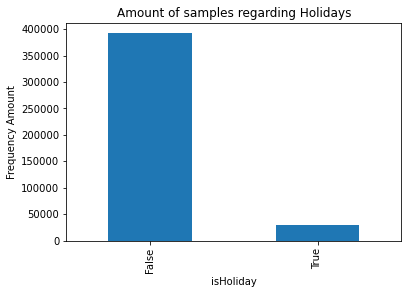

In [138]:
# Regarding trainingset


fig = plt.figure()
fig.set_facecolor("white")

df_train["IsHoliday"].value_counts().plot(kind="bar")
plt.title("Amount of samples regarding Holidays")
plt.xlabel("isHoliday")
plt.ylabel("Frequency Amount")

### 

Text(0, 0.5, 'Frequency Amount')

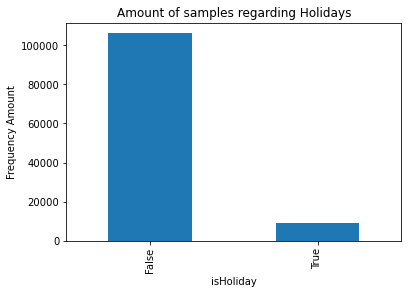

In [139]:
# Regardubg the test set
fig = plt.figure()
fig.set_facecolor("white")

df_test["IsHoliday"].value_counts().plot(kind="bar")
plt.title("Amount of samples regarding Holidays")
plt.xlabel("isHoliday")
plt.ylabel("Frequency Amount")

Insight: There is much more normal days than holidays, what is expected, the holidays are the minor part of overrall year.


### Storage Types

Text(0, 0.5, 'Frequency Amount')

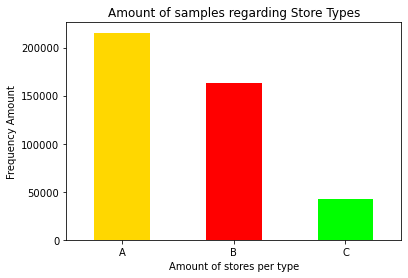

In [140]:
# Regardubg the train set
fig = plt.figure()
fig.set_facecolor("white")
STORE_TYPE_COLORS = ["gold","red","lime"]

df_train["Type"].value_counts().plot(kind="bar", color=STORE_TYPE_COLORS)
plt.title("Amount of samples regarding Store Types")
plt.xlabel("Amount of stores per type")
plt.xticks(rotation=0)
plt.ylabel("Frequency Amount")



Text(0, 0.5, 'Frequency Amount')

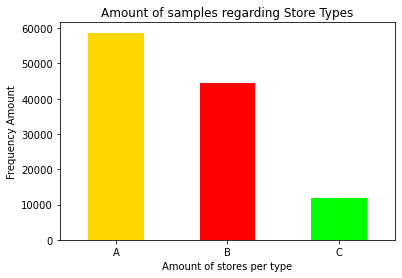

In [141]:
# Regardubg the test set
fig = plt.figure()
fig.set_facecolor("white")

df_test["Type"].value_counts().plot(kind="bar", color=STORE_TYPE_COLORS)
plt.title("Amount of samples regarding Store Types")
plt.xlabel("Amount of stores per type")
plt.xticks(rotation=0)
plt.ylabel("Frequency Amount")


Insight: Type A is the most in amount. Both Train and test follow the same distribution what is an indicative that they were result from a split of same dataset.

### Types per area

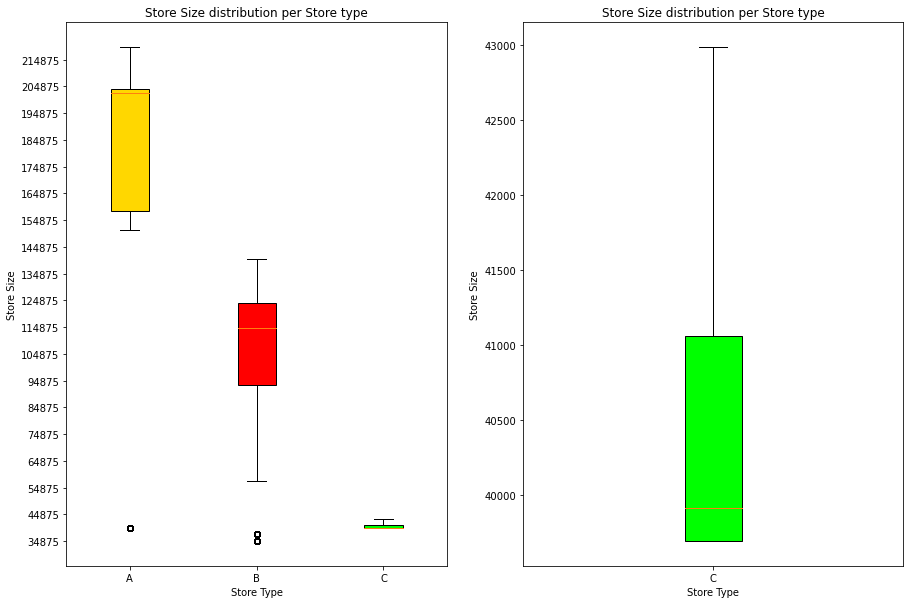

In [142]:
# Regardubg the train set


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.set_facecolor("white")
store_types = ["A","B","C"]

values = []
for cat in store_types:
    tmp = df_train[ df_train['Type'] == cat]["Size"].values
    values.append(tmp)

bp1  = ax[0].boxplot(values, patch_artist=True, labels=store_types )
bp2 = ax[1].boxplot(values[2], patch_artist=True, labels=store_types[2] )


for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle=":")

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=3)

# change style of fliers
for flier in bp['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# change color of boxes
for patch, color in zip(bp1['boxes'], STORE_TYPE_COLORS):
    patch.set_facecolor(color)
    
    

box =  bp2['boxes'][0]
box.set_facecolor(STORE_TYPE_COLORS[2])

#set labels
for axs in ax:
    axs.set_title("Store Size distribution per Store type")
    axs.set_xlabel("Store Type")
    axs.set_ylabel("Store Size")
    
    
ax[0].set_yticks( np.arange(df_train["Size"].min(),df_train["Size"].max(), 10000))



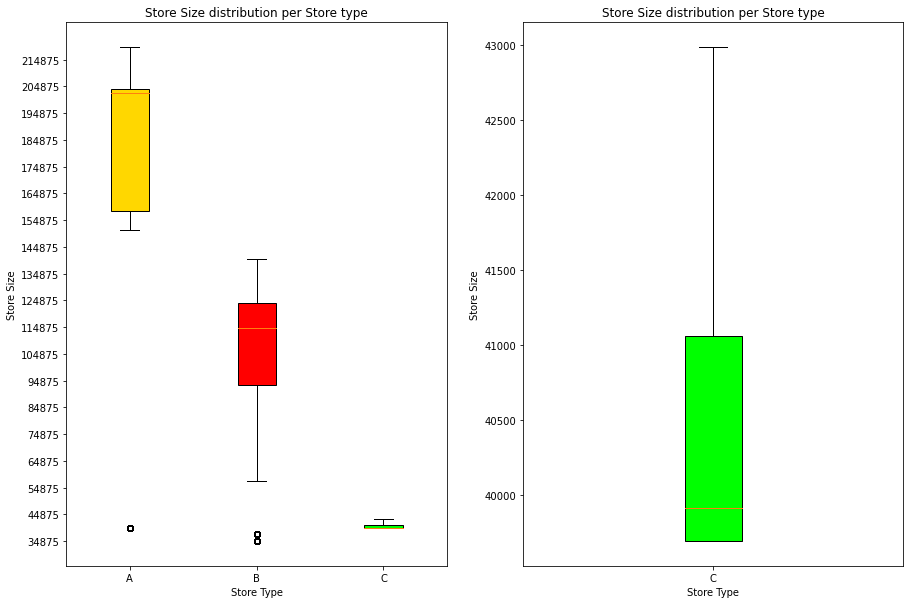

In [143]:
# Regardubg the train set


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.set_facecolor("white")
store_types = ["A","B","C"]

values = []
for cat in store_types:
    tmp = df_test[ df_test['Type'] == cat]["Size"].values
    values.append(tmp)

bp1  = ax[0].boxplot(values, patch_artist=True, labels=store_types )
bp2 = ax[1].boxplot(values[2], patch_artist=True, labels=store_types[2] )


for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle=":")

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=3)

# change style of fliers
for flier in bp['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# change color of boxes
for patch, color in zip(bp1['boxes'], STORE_TYPE_COLORS):
    patch.set_facecolor(color)
    
    

box =  bp2['boxes'][0]
box.set_facecolor(STORE_TYPE_COLORS[2])

#set labels
for axs in ax:
    axs.set_title("Store Size distribution per Store type")
    axs.set_xlabel("Store Type")
    axs.set_ylabel("Store Size")
    
    
ax[0].set_yticks( np.arange(df_train["Size"].min(),df_train["Size"].max(), 10000))



Insight: In both dataset is very clear a separation between the store types, there are  clear sepaated ranges Store size per type.

### Store balancing

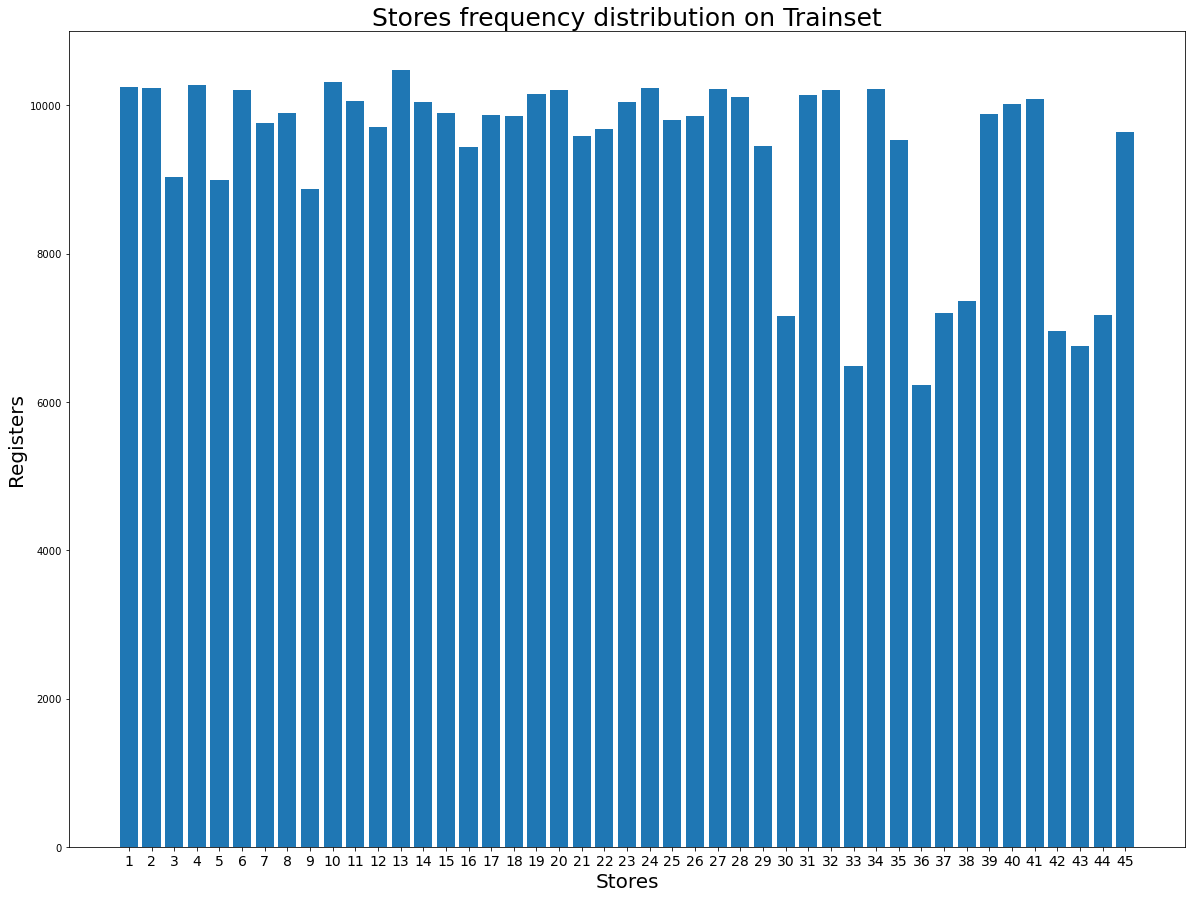

In [189]:
# Regarding the train set
fig = plt.figure( figsize=(20,15))
fig.set_facecolor('white')
store_counts= pd.DataFrame(df_train['Store'].value_counts()).sort_index()


#ax = store_counts.plot(kind='bar', figsize=(30,20), color='gold' )

ax = plt.bar(store_counts.index.values,store_counts.iloc[:,0])
plt.xlabel("Stores", fontsize=20)
plt.ylabel("Registers", fontsize=20)
plt.title("Stores frequency distribution on Trainset", fontsize=25)
plt.xticks(store_counts.index.values, fontsize=14)

fig.set_facecolor("white")




In [190]:
max_val = np.max(store_counts.iloc[:,0])
min_val  = np.min(store_counts.iloc[:,0])
diff_vals_perc =  (max_val - min_val) / max_val *100
print("Trainset\n max: %d \n min: %d \n  Percentage difference: %.2f%s  \n " %( max_val, min_val, diff_vals_perc,'%'))

Trainset
 max: 10474 
 min: 6222 
  Percentage difference: 40.60%  
 


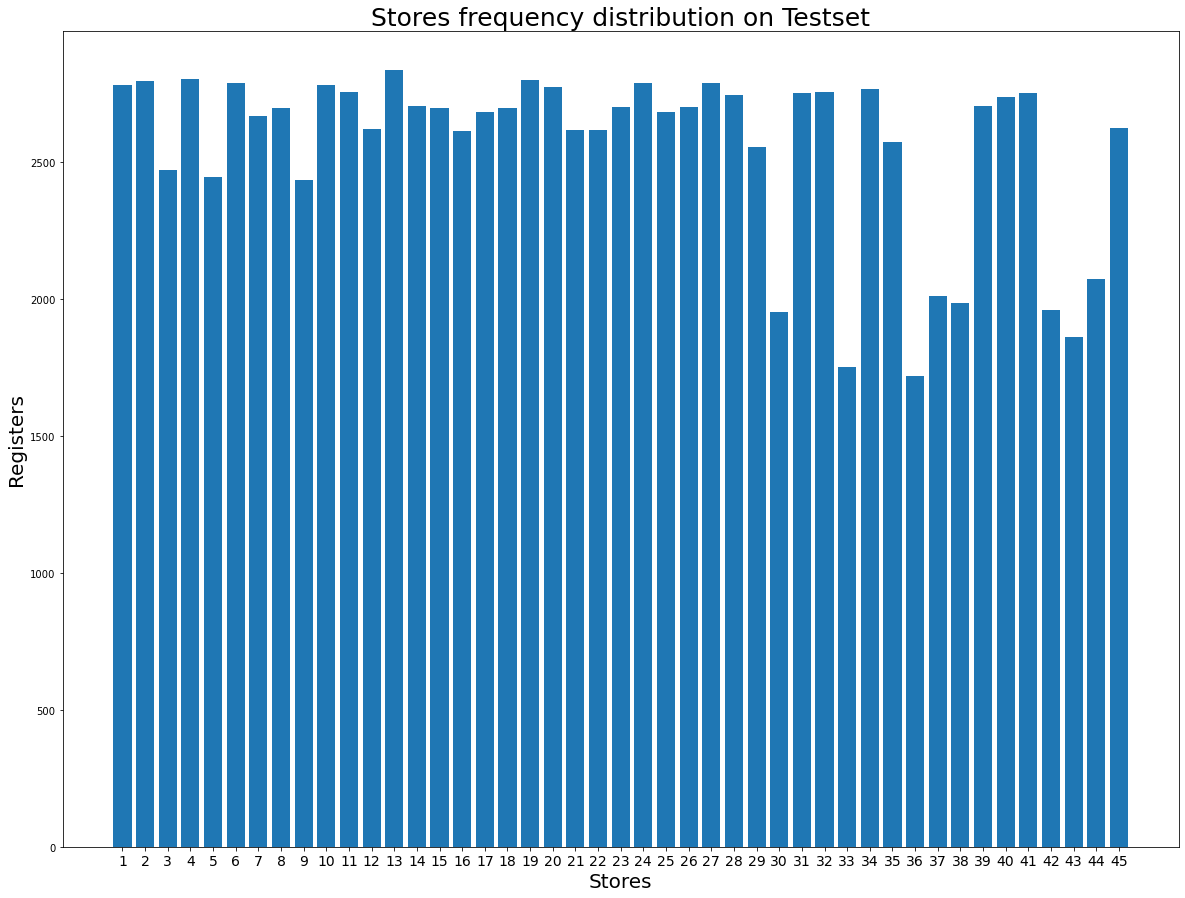

In [191]:
# Regarding the test set
fig = plt.figure( figsize=(20,15))
fig.set_facecolor('white')
store_counts= pd.DataFrame(df_test['Store'].value_counts()).sort_index()


#ax = store_counts.plot(kind='bar', figsize=(30,20), color='gold' )

ax = plt.bar(store_counts.index.values,store_counts.iloc[:,0])
plt.xlabel("Stores", fontsize=20)
plt.ylabel("Registers", fontsize=20)
plt.title("Stores frequency distribution on Testset", fontsize=25)
plt.xticks(store_counts.index.values, fontsize=14)

fig.set_facecolor("white")

In [192]:
max_val = np.max(store_counts.iloc[:,0])
min_val  = np.min(store_counts.iloc[:,0])
diff_vals_perc =  (max_val - min_val) / max_val *100
print("Trainset\n max: %d \n min: %d \n  Percentage difference: %.2f%s  \n " %( max_val, min_val, diff_vals_perc,'%'))

Trainset
 max: 2836 
 min: 1718 
  Percentage difference: 39.42%  
 


Insight: The  quantity of  register per store is reasonable different. It may no impact foward analysis, but we can see that on dataset some store are more partifipant of other with a maximum range of  approximately 40% on both sets.

on the path: "dataset\assets\outliers_analysis"

I made a mapping of departament amount  register by store  and some interesting things appeard:

- Most of departamente regiter,  yeah almost all, was balanced. 
- The departament with bigger discrepance were the 99
- With this mapping we get a sense which store has each department
- For sales it can be interesting to perform strategy, much problably stores that gives the biggests Sales has the  most rentable deparments, for bussiness strategy it can be crucial